In [1]:
using LinearAlgebra
using UnPack
using LinearSolve 
using SparseArrays
using Ferrite
using FerriteGmsh 
using OrdinaryDiffEq
using Plots 
using WriteVTK

In [2]:
try
    using Gmsh: gmsh
catch
    using gmsh
end 

### Requires extension with subdomain information (look into msh file)

In [3]:
?gmsh.model.mesh.getNodesForPhysicalGroup

```
gmsh.model.mesh.getNodesForPhysicalGroup(dim, tag)
```

Get the nodes from all the elements belonging to the physical group of dimension `dim` and tag `tag`. `nodeTags` contains the node tags; `coord` is a vector of length 3 times the length of `nodeTags` that contains the x, y, z coordinates of the nodes, concatenated: [n1x, n1y, n1z, n2x, ...].

Return `nodeTags`, `coord`.

Types:

  * `dim`: integer
  * `tag`: integer
  * `nodeTags`: vector of sizes
  * `coord`: vector of doubles


In [4]:
#..1/4: Finalize gmsh
gmsh.initialize()

#..2/4: Read mesh from file
gmsh.open("three-phase-cable.msh")

#..3/4: perform loop over the elemements 
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

group1 = gmsh.model.mesh.getNodesForPhysicalGroup(2,4)
  
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]

    if (true)
      println("on element ", element_id, " node-1 has global number ", node1_id)
      println("on element ", element_id, " node-2 has global number ", node2_id)
      println("on element ", element_id, " node-3 has global number ", node3_id)
      println(" ")
    end 

end 

#..4/4: Finalize gmsh
# gmsh.finalize()

Info    : Reading 'three-phase-cable.msh'...
Info    : 18 entities
Info    : 1705 nodes
Info    : 3363 elements
Info    : Done reading 'three-phase-cable.msh'
on element 1 node-1 has global number 711
on element 1 node-2 has global number 866
on element 1 node-3 has global number 500
 
on element 2 node-1 has global number 122
on element 2 node-2 has global number 784
on element 2 node-3 has global number 121
 
on element 3 node-1 has global number 100
on element 3 node-2 has global number 801
on element 3 node-3 has global number 99
 
on element 4 node-1 has global number 383
on element 4 node-2 has global number 866
on element 4 node-3 has global number 711
 
on element 5 node-1 has global number 9
on element 5 node-2 has global number 802
on element 5 node-3 has global number 8
 
on element 6 node-1 has global number 803
on element 6 node-2 has global number 903
on element 6 node-3 has global number 205
 
on element 7 node-1 has global number 730
on element 7 node-2 has global numbe

on element 79 node-2 has global number 728
on element 79 node-3 has global number 44
 
on element 80 node-1 has global number 712
on element 80 node-2 has global number 836
on element 80 node-3 has global number 588
 
on element 81 node-1 has global number 400
on element 81 node-2 has global number 664
on element 81 node-3 has global number 403
 
on element 82 node-1 has global number 325
on element 82 node-2 has global number 802
on element 82 node-3 has global number 9
 
on element 83 node-1 has global number 441
on element 83 node-2 has global number 894
on element 83 node-3 has global number 849
 
on element 84 node-1 has global number 470
on element 84 node-2 has global number 847
on element 84 node-3 has global number 704
 
on element 85 node-1 has global number 671
on element 85 node-2 has global number 727
on element 85 node-3 has global number 331
 
on element 86 node-1 has global number 427
on element 86 node-2 has global number 781
on element 86 node-3 has global number 329


on element 156 node-2 has global number 921
on element 156 node-3 has global number 620
 
on element 157 node-1 has global number 762
on element 157 node-2 has global number 793
on element 157 node-3 has global number 342
 
on element 158 node-1 has global number 937
on element 158 node-2 has global number 941
on element 158 node-3 has global number 315
 
on element 159 node-1 has global number 394
on element 159 node-2 has global number 795
on element 159 node-3 has global number 27
 
on element 160 node-1 has global number 26
on element 160 node-2 has global number 795
on element 160 node-3 has global number 339
 
on element 161 node-1 has global number 326
on element 161 node-2 has global number 916
on element 161 node-3 has global number 648
 
on element 162 node-1 has global number 514
on element 162 node-2 has global number 736
on element 162 node-3 has global number 515
 
on element 163 node-1 has global number 662
on element 163 node-2 has global number 843
on element 163 node-

on element 233 node-1 has global number 701
on element 233 node-2 has global number 858
on element 233 node-3 has global number 2
 
on element 234 node-1 has global number 653
on element 234 node-2 has global number 843
on element 234 node-3 has global number 662
 
on element 235 node-1 has global number 717
on element 235 node-2 has global number 732
on element 235 node-3 has global number 403
 
on element 236 node-1 has global number 738
on element 236 node-2 has global number 846
on element 236 node-3 has global number 646
 
on element 237 node-1 has global number 403
on element 237 node-2 has global number 766
on element 237 node-3 has global number 717
 
on element 238 node-1 has global number 820
on element 238 node-2 has global number 992
on element 238 node-3 has global number 648
 
on element 239 node-1 has global number 648
on element 239 node-2 has global number 992
on element 239 node-3 has global number 592
 
on element 240 node-1 has global number 331
on element 240 node-

on element 309 node-3 has global number 201
 
on element 310 node-1 has global number 202
on element 310 node-2 has global number 709
on element 310 node-3 has global number 203
 
on element 311 node-1 has global number 144
on element 311 node-2 has global number 694
on element 311 node-3 has global number 145
 
on element 312 node-1 has global number 137
on element 312 node-2 has global number 699
on element 312 node-3 has global number 138
 
on element 313 node-1 has global number 756
on element 313 node-2 has global number 887
on element 313 node-3 has global number 755
 
on element 314 node-1 has global number 887
on element 314 node-2 has global number 889
on element 314 node-3 has global number 755
 
on element 315 node-1 has global number 683
on element 315 node-2 has global number 836
on element 315 node-3 has global number 352
 
on element 316 node-1 has global number 703
on element 316 node-2 has global number 884
on element 316 node-3 has global number 488
 
on element 317 n

on element 438 node-3 has global number 514
 
on element 439 node-1 has global number 432
on element 439 node-2 has global number 740
on element 439 node-3 has global number 435
 
on element 440 node-1 has global number 471
on element 440 node-2 has global number 753
on element 440 node-3 has global number 474
 
on element 441 node-1 has global number 436
on element 441 node-2 has global number 747
on element 441 node-3 has global number 438
 
on element 442 node-1 has global number 523
on element 442 node-2 has global number 744
on element 442 node-3 has global number 525
 
on element 443 node-1 has global number 527
on element 443 node-2 has global number 532
on element 443 node-3 has global number 529
 
on element 444 node-1 has global number 443
on element 444 node-2 has global number 725
on element 444 node-3 has global number 446
 
on element 445 node-1 has global number 525
on element 445 node-2 has global number 743
on element 445 node-3 has global number 527
 
on element 446 n

on element 515 node-2 has global number 570
on element 515 node-3 has global number 568
 
on element 516 node-1 has global number 589
on element 516 node-2 has global number 592
on element 516 node-3 has global number 590
 
on element 517 node-1 has global number 643
on element 517 node-2 has global number 752
on element 517 node-3 has global number 645
 
on element 518 node-1 has global number 460
on element 518 node-2 has global number 462
on element 518 node-3 has global number 461
 
on element 519 node-1 has global number 510
on element 519 node-2 has global number 514
on element 519 node-3 has global number 512
 
on element 520 node-1 has global number 502
on element 520 node-2 has global number 504
on element 520 node-3 has global number 503
 
on element 521 node-1 has global number 545
on element 521 node-2 has global number 756
on element 521 node-3 has global number 549
 
on element 522 node-1 has global number 661
on element 522 node-2 has global number 716
on element 522 nod

on element 591 node-3 has global number 414
 
on element 592 node-1 has global number 629
on element 592 node-2 has global number 631
on element 592 node-3 has global number 630
 
on element 593 node-1 has global number 417
on element 593 node-2 has global number 421
on element 593 node-3 has global number 420
 
on element 594 node-1 has global number 586
on element 594 node-2 has global number 589
on element 594 node-3 has global number 588
 
on element 595 node-1 has global number 496
on element 595 node-2 has global number 498
on element 595 node-3 has global number 497
 
on element 596 node-1 has global number 559
on element 596 node-2 has global number 560
on element 596 node-3 has global number 558
 
on element 597 node-1 has global number 632
on element 597 node-2 has global number 635
on element 597 node-3 has global number 634
 
on element 598 node-1 has global number 457
on element 598 node-2 has global number 460
on element 598 node-3 has global number 459
 
on element 599 n

on element 668 node-2 has global number 607
on element 668 node-3 has global number 606
 
on element 669 node-1 has global number 631
on element 669 node-2 has global number 632
on element 669 node-3 has global number 630
 
on element 670 node-1 has global number 498
on element 670 node-2 has global number 499
on element 670 node-3 has global number 497
 
on element 671 node-1 has global number 655
on element 671 node-2 has global number 657
on element 671 node-3 has global number 656
 
on element 672 node-1 has global number 560
on element 672 node-2 has global number 562
on element 672 node-3 has global number 561
 
on element 673 node-1 has global number 583
on element 673 node-2 has global number 584
on element 673 node-3 has global number 582
 
on element 674 node-1 has global number 477
on element 674 node-2 has global number 479
on element 674 node-3 has global number 478
 
on element 675 node-1 has global number 454
on element 675 node-2 has global number 455
on element 675 nod

on element 744 node-3 has global number 473
 
on element 745 node-1 has global number 586
on element 745 node-2 has global number 588
on element 745 node-3 has global number 587
 
on element 746 node-1 has global number 607
on element 746 node-2 has global number 608
on element 746 node-3 has global number 606
 
on element 747 node-1 has global number 457
on element 747 node-2 has global number 459
on element 747 node-3 has global number 458
 
on element 748 node-1 has global number 479
on element 748 node-2 has global number 480
on element 748 node-3 has global number 478
 
on element 749 node-1 has global number 653
on element 749 node-2 has global number 654
on element 749 node-3 has global number 651
 
on element 750 node-1 has global number 131
on element 750 node-2 has global number 387
on element 750 node-3 has global number 130
 
on element 751 node-1 has global number 121
on element 751 node-2 has global number 388
on element 751 node-3 has global number 120
 
on element 752 n

on element 842 node-2 has global number 458
on element 842 node-3 has global number 455
 
on element 843 node-1 has global number 499
on element 843 node-2 has global number 500
on element 843 node-3 has global number 497
 
on element 844 node-1 has global number 595
on element 844 node-2 has global number 765
on element 844 node-3 has global number 594
 
on element 845 node-1 has global number 453
on element 845 node-2 has global number 466
on element 845 node-3 has global number 451
 
on element 846 node-1 has global number 641
on element 846 node-2 has global number 764
on element 846 node-3 has global number 640
 
on element 847 node-1 has global number 537
on element 847 node-2 has global number 538
on element 847 node-3 has global number 535
 
on element 848 node-1 has global number 411
on element 848 node-2 has global number 412
on element 848 node-3 has global number 409
 
on element 849 node-1 has global number 420
on element 849 node-2 has global number 670
on element 849 nod

on element 919 node-1 has global number 718
on element 919 node-2 has global number 978
on element 919 node-3 has global number 511
 
on element 920 node-1 has global number 536
on element 920 node-2 has global number 786
on element 920 node-3 has global number 741
 
on element 921 node-1 has global number 692
on element 921 node-2 has global number 978
on element 921 node-3 has global number 718
 
on element 922 node-1 has global number 132
on element 922 node-2 has global number 858
on element 922 node-3 has global number 375
 
on element 923 node-1 has global number 414
on element 923 node-2 has global number 787
on element 923 node-3 has global number 416
 
on element 924 node-1 has global number 969
on element 924 node-2 has global number 973
on element 924 node-3 has global number 682
 
on element 925 node-1 has global number 374
on element 925 node-2 has global number 986
on element 925 node-3 has global number 954
 
on element 926 node-1 has global number 413
on element 926 nod

on element 995 node-2 has global number 803
on element 995 node-3 has global number 204
 
on element 996 node-1 has global number 433
on element 996 node-2 has global number 845
on element 996 node-3 has global number 719
 
on element 997 node-1 has global number 825
on element 997 node-2 has global number 834
on element 997 node-3 has global number 733
 
on element 998 node-1 has global number 185
on element 998 node-2 has global number 919
on element 998 node-3 has global number 356
 
on element 999 node-1 has global number 380
on element 999 node-2 has global number 919
on element 999 node-3 has global number 184
 
on element 1000 node-1 has global number 197
on element 1000 node-2 has global number 918
on element 1000 node-3 has global number 198
 
on element 1001 node-1 has global number 620
on element 1001 node-2 has global number 921
on element 1001 node-3 has global number 899
 
on element 1002 node-1 has global number 208
on element 1002 node-2 has global number 925
on element

on element 1070 node-3 has global number 19
 
on element 1071 node-1 has global number 109
on element 1071 node-2 has global number 818
on element 1071 node-3 has global number 332
 
on element 1072 node-1 has global number 89
on element 1072 node-2 has global number 817
on element 1072 node-3 has global number 340
 
on element 1073 node-1 has global number 16
on element 1073 node-2 has global number 816
on element 1073 node-3 has global number 345
 
on element 1074 node-1 has global number 348
on element 1074 node-2 has global number 812
on element 1074 node-3 has global number 1
 
on element 1075 node-1 has global number 69
on element 1075 node-2 has global number 813
on element 1075 node-3 has global number 347
 
on element 1076 node-1 has global number 129
on element 1076 node-2 has global number 822
on element 1076 node-3 has global number 323
 
on element 1077 node-1 has global number 326
on element 1077 node-2 has global number 823
on element 1077 node-3 has global number 72
 
o

on element 1145 node-3 has global number 845
 
on element 1146 node-1 has global number 574
on element 1146 node-2 has global number 900
on element 1146 node-3 has global number 618
 
on element 1147 node-1 has global number 82
on element 1147 node-2 has global number 837
on element 1147 node-3 has global number 81
 
on element 1148 node-1 has global number 787
on element 1148 node-2 has global number 873
on element 1148 node-3 has global number 761
 
on element 1149 node-1 has global number 14
on element 1149 node-2 has global number 854
on element 1149 node-3 has global number 13
 
on element 1150 node-1 has global number 603
on element 1150 node-2 has global number 902
on element 1150 node-3 has global number 668
 
on element 1151 node-1 has global number 524
on element 1151 node-2 has global number 860
on element 1151 node-3 has global number 853
 
on element 1152 node-1 has global number 673
on element 1152 node-2 has global number 901
on element 1152 node-3 has global number 518


on element 1243 node-3 has global number 114
 
on element 1244 node-1 has global number 189
on element 1244 node-2 has global number 861
on element 1244 node-3 has global number 190
 
on element 1245 node-1 has global number 67
on element 1245 node-2 has global number 908
on element 1245 node-3 has global number 66
 
on element 1246 node-1 has global number 98
on element 1246 node-2 has global number 910
on element 1246 node-3 has global number 97
 
on element 1247 node-1 has global number 118
on element 1247 node-2 has global number 911
on element 1247 node-3 has global number 117
 
on element 1248 node-1 has global number 770
on element 1248 node-2 has global number 855
on element 1248 node-3 has global number 459
 
on element 1249 node-1 has global number 772
on element 1249 node-2 has global number 940
on element 1249 node-3 has global number 375
 
on element 1250 node-1 has global number 21
on element 1250 node-2 has global number 915
on element 1250 node-3 has global number 20
 


on element 1318 node-3 has global number 354
 
on element 1319 node-1 has global number 818
on element 1319 node-2 has global number 851
on element 1319 node-3 has global number 332
 
on element 1320 node-1 has global number 485
on element 1320 node-2 has global number 864
on element 1320 node-3 has global number 487
 
on element 1321 node-1 has global number 711
on element 1321 node-2 has global number 913
on element 1321 node-3 has global number 360
 
on element 1322 node-1 has global number 345
on element 1322 node-2 has global number 946
on element 1322 node-3 has global number 753
 
on element 1323 node-1 has global number 561
on element 1323 node-2 has global number 865
on element 1323 node-3 has global number 558
 
on element 1324 node-1 has global number 396
on element 1324 node-2 has global number 852
on element 1324 node-3 has global number 816
 
on element 1325 node-1 has global number 478
on element 1325 node-2 has global number 905
on element 1325 node-3 has global number 

on element 1393 node-2 has global number 891
on element 1393 node-3 has global number 36
 
on element 1394 node-1 has global number 339
on element 1394 node-2 has global number 932
on element 1394 node-3 has global number 897
 
on element 1395 node-1 has global number 506
on element 1395 node-2 has global number 980
on element 1395 node-3 has global number 824
 
on element 1396 node-1 has global number 324
on element 1396 node-2 has global number 908
on element 1396 node-3 has global number 900
 
on element 1397 node-1 has global number 753
on element 1397 node-2 has global number 946
on element 1397 node-3 has global number 474
 
on element 1398 node-1 has global number 950
on element 1398 node-2 has global number 955
on element 1398 node-3 has global number 355
 
on element 1399 node-1 has global number 673
on element 1399 node-2 has global number 985
on element 1399 node-3 has global number 901
 
on element 1400 node-1 has global number 736
on element 1400 node-2 has global number 9

on element 1468 node-2 has global number 950
on element 1468 node-3 has global number 480
 
on element 1469 node-1 has global number 591
on element 1469 node-2 has global number 932
on element 1469 node-3 has global number 490
 
on element 1470 node-1 has global number 780
on element 1470 node-2 has global number 942
on element 1470 node-3 has global number 326
 
on element 1471 node-1 has global number 451
on element 1471 node-2 has global number 933
on element 1471 node-3 has global number 449
 
on element 1472 node-1 has global number 557
on element 1472 node-2 has global number 934
on element 1472 node-3 has global number 555
 
on element 1473 node-1 has global number 696
on element 1473 node-2 has global number 952
on element 1473 node-3 has global number 697
 
on element 1474 node-1 has global number 494
on element 1474 node-2 has global number 989
on element 1474 node-3 has global number 491
 
on element 1475 node-1 has global number 625
on element 1475 node-2 has global number 

on element 1543 node-2 has global number 946
on element 1543 node-3 has global number 852
 
on element 1544 node-1 has global number 842
on element 1544 node-2 has global number 938
on element 1544 node-3 has global number 546
 
on element 1545 node-1 has global number 365
on element 1545 node-2 has global number 936
on element 1545 node-3 has global number 867
 
on element 1546 node-1 has global number 797
on element 1546 node-2 has global number 963
on element 1546 node-3 has global number 631
 
on element 1547 node-1 has global number 700
on element 1547 node-2 has global number 953
on element 1547 node-3 has global number 830
 
on element 1548 node-1 has global number 960
on element 1548 node-2 has global number 976
on element 1548 node-3 has global number 127
 
on element 1549 node-1 has global number 816
on element 1549 node-2 has global number 946
on element 1549 node-3 has global number 345
 
on element 1550 node-1 has global number 872
on element 1550 node-2 has global number 

on element 1646 node-1 has global number 1115
on element 1646 node-2 has global number 1350
on element 1646 node-3 has global number 1113
 
on element 1647 node-1 has global number 1085
on element 1647 node-2 has global number 1211
on element 1647 node-3 has global number 1082
 
on element 1648 node-1 has global number 1126
on element 1648 node-2 has global number 1270
on element 1648 node-3 has global number 1125
 
on element 1649 node-1 has global number 1225
on element 1649 node-2 has global number 1251
on element 1649 node-3 has global number 1250
 
on element 1650 node-1 has global number 1252
on element 1650 node-2 has global number 1314
on element 1650 node-3 has global number 1051
 
on element 1651 node-1 has global number 1225
on element 1651 node-2 has global number 1250
on element 1651 node-3 has global number 1053
 
on element 1652 node-1 has global number 1132
on element 1652 node-2 has global number 1204
on element 1652 node-3 has global number 1129
 
on element 1653 node

on element 1719 node-2 has global number 1301
on element 1719 node-3 has global number 1286
 
on element 1720 node-1 has global number 1031
on element 1720 node-2 has global number 1344
on element 1720 node-3 has global number 1232
 
on element 1721 node-1 has global number 1253
on element 1721 node-2 has global number 1288
on element 1721 node-3 has global number 1254
 
on element 1722 node-1 has global number 208
on element 1722 node-2 has global number 1295
on element 1722 node-3 has global number 207
 
on element 1723 node-1 has global number 204
on element 1723 node-2 has global number 1240
on element 1723 node-3 has global number 1227
 
on element 1724 node-1 has global number 1092
on element 1724 node-2 has global number 1211
on element 1724 node-3 has global number 1099
 
on element 1725 node-1 has global number 1266
on element 1725 node-2 has global number 1318
on element 1725 node-3 has global number 1074
 
on element 1726 node-1 has global number 1230
on element 1726 node-2 

on element 1793 node-1 has global number 1004
on element 1793 node-2 has global number 1217
on element 1793 node-3 has global number 272
 
on element 1794 node-1 has global number 241
on element 1794 node-2 has global number 1056
on element 1794 node-3 has global number 1019
 
on element 1795 node-1 has global number 230
on element 1795 node-2 has global number 1102
on element 1795 node-3 has global number 1017
 
on element 1796 node-1 has global number 1013
on element 1796 node-2 has global number 1191
on element 1796 node-3 has global number 228
 
on element 1797 node-1 has global number 1010
on element 1797 node-2 has global number 1184
on element 1797 node-3 has global number 239
 
on element 1798 node-1 has global number 254
on element 1798 node-2 has global number 1164
on element 1798 node-3 has global number 1011
 
on element 1799 node-1 has global number 219
on element 1799 node-2 has global number 1127
on element 1799 node-3 has global number 1015
 
on element 1800 node-1 has 

on element 1866 node-2 has global number 1051
on element 1866 node-3 has global number 176
 
on element 1867 node-1 has global number 157
on element 1867 node-2 has global number 1053
on element 1867 node-3 has global number 156
 
on element 1868 node-1 has global number 194
on element 1868 node-2 has global number 1052
on element 1868 node-3 has global number 193
 
on element 1869 node-1 has global number 211
on element 1869 node-2 has global number 1054
on element 1869 node-3 has global number 210
 
on element 1870 node-1 has global number 140
on element 1870 node-2 has global number 1055
on element 1870 node-3 has global number 139
 
on element 1871 node-1 has global number 167
on element 1871 node-2 has global number 1050
on element 1871 node-3 has global number 166
 
on element 1872 node-1 has global number 184
on element 1872 node-2 has global number 1049
on element 1872 node-3 has global number 183
 
on element 1873 node-1 has global number 201
on element 1873 node-2 has global 

on element 1940 node-2 has global number 1174
on element 1940 node-3 has global number 1171
 
on element 1941 node-1 has global number 1119
on element 1941 node-2 has global number 1120
on element 1941 node-3 has global number 1118
 
on element 1942 node-1 has global number 1073
on element 1942 node-2 has global number 1074
on element 1942 node-3 has global number 1072
 
on element 1943 node-1 has global number 1160
on element 1943 node-2 has global number 1161
on element 1943 node-3 has global number 1159
 
on element 1944 node-1 has global number 1150
on element 1944 node-2 has global number 1151
on element 1944 node-3 has global number 1149
 
on element 1945 node-1 has global number 1087
on element 1945 node-2 has global number 1088
on element 1945 node-3 has global number 1086
 
on element 1946 node-1 has global number 1131
on element 1946 node-2 has global number 1133
on element 1946 node-3 has global number 1132
 
on element 1947 node-1 has global number 1107
on element 1947 node

on element 2050 node-2 has global number 1224
on element 2050 node-3 has global number 1084
 
on element 2051 node-1 has global number 1175
on element 2051 node-2 has global number 1223
on element 2051 node-3 has global number 1167
 
on element 2052 node-1 has global number 1084
on element 2052 node-2 has global number 1224
on element 2052 node-3 has global number 1090
 
on element 2053 node-1 has global number 1197
on element 2053 node-2 has global number 1327
on element 2053 node-3 has global number 1321
 
on element 2054 node-1 has global number 1162
on element 2054 node-2 has global number 1225
on element 2054 node-3 has global number 1161
 
on element 2055 node-1 has global number 270
on element 2055 node-2 has global number 1328
on element 2055 node-3 has global number 271
 
on element 2056 node-1 has global number 248
on element 2056 node-2 has global number 1329
on element 2056 node-3 has global number 249
 
on element 2057 node-1 has global number 1190
on element 2057 node-2 h

on element 2123 node-3 has global number 1181
 
on element 2124 node-1 has global number 1024
on element 2124 node-2 has global number 1330
on element 2124 node-3 has global number 1284
 
on element 2125 node-1 has global number 1254
on element 2125 node-2 has global number 1288
on element 2125 node-3 has global number 1099
 
on element 2126 node-1 has global number 1220
on element 2126 node-2 has global number 1347
on element 2126 node-3 has global number 1258
 
on element 2127 node-1 has global number 1227
on element 2127 node-2 has global number 1240
on element 2127 node-3 has global number 1100
 
on element 2128 node-1 has global number 1031
on element 2128 node-2 has global number 1240
on element 2128 node-3 has global number 205
 
on element 2129 node-1 has global number 1219
on element 2129 node-2 has global number 1288
on element 2129 node-3 has global number 1047
 
on element 2130 node-1 has global number 1213
on element 2130 node-2 has global number 1310
on element 2130 node-

on element 2197 node-3 has global number 1229
 
on element 2198 node-1 has global number 1162
on element 2198 node-2 has global number 1293
on element 2198 node-3 has global number 1225
 
on element 2199 node-1 has global number 1225
on element 2199 node-2 has global number 1293
on element 2199 node-3 has global number 1251
 
on element 2200 node-1 has global number 1339
on element 2200 node-2 has global number 1372
on element 2200 node-3 has global number 1200
 
on element 2201 node-1 has global number 1170
on element 2201 node-2 has global number 1338
on element 2201 node-3 has global number 1201
 
on element 2202 node-1 has global number 1049
on element 2202 node-2 has global number 1276
on element 2202 node-3 has global number 183
 
on element 2203 node-1 has global number 182
on element 2203 node-2 has global number 1276
on element 2203 node-3 has global number 1026
 
on element 2204 node-1 has global number 1133
on element 2204 node-2 has global number 1339
on element 2204 node-3

on element 2271 node-1 has global number 150
on element 2271 node-2 has global number 1310
on element 2271 node-3 has global number 1048
 
on element 2272 node-1 has global number 1027
on element 2272 node-2 has global number 1310
on element 2272 node-3 has global number 151
 
on element 2273 node-1 has global number 1047
on element 2273 node-2 has global number 1319
on element 2273 node-3 has global number 1219
 
on element 2274 node-1 has global number 167
on element 2274 node-2 has global number 1311
on element 2274 node-3 has global number 1050
 
on element 2275 node-1 has global number 1025
on element 2275 node-2 has global number 1311
on element 2275 node-3 has global number 168
 
on element 2276 node-1 has global number 183
on element 2276 node-2 has global number 1276
on element 2276 node-3 has global number 182
 
on element 2277 node-1 has global number 1248
on element 2277 node-2 has global number 1363
on element 2277 node-3 has global number 1040
 
on element 2278 node-1 has

on element 2344 node-2 has global number 1308
on element 2344 node-3 has global number 1154
 
on element 2345 node-1 has global number 1179
on element 2345 node-2 has global number 1316
on element 2345 node-3 has global number 1180
 
on element 2346 node-1 has global number 1054
on element 2346 node-2 has global number 1365
on element 2346 node-3 has global number 1270
 
on element 2347 node-1 has global number 1040
on element 2347 node-2 has global number 1296
on element 2347 node-3 has global number 137
 
on element 2348 node-1 has global number 149
on element 2348 node-2 has global number 1297
on element 2348 node-3 has global number 148
 
on element 2349 node-1 has global number 1232
on element 2349 node-2 has global number 1295
on element 2349 node-3 has global number 1231
 
on element 2350 node-1 has global number 1251
on element 2350 node-2 has global number 1293
on element 2350 node-3 has global number 1112
 
on element 2351 node-1 has global number 160
on element 2351 node-2 h

on element 2453 node-1 has global number 1366
on element 2453 node-2 has global number 1370
on element 2453 node-3 has global number 1085
 
on element 2454 node-1 has global number 1095
on element 2454 node-2 has global number 1361
on element 2454 node-3 has global number 1097
 
on element 2455 node-1 has global number 1225
on element 2455 node-2 has global number 1359
on element 2455 node-3 has global number 1161
 
on element 2456 node-1 has global number 1053
on element 2456 node-2 has global number 1359
on element 2456 node-3 has global number 1225
 
on element 2457 node-1 has global number 1264
on element 2457 node-2 has global number 1325
on element 2457 node-3 has global number 1262
 
on element 2458 node-1 has global number 1258
on element 2458 node-2 has global number 1347
on element 2458 node-3 has global number 1257
 
on element 2459 node-1 has global number 1161
on element 2459 node-2 has global number 1359
on element 2459 node-3 has global number 1332
 
on element 2460 node

on element 2526 node-2 has global number 1636
on element 2526 node-3 has global number 1628
 
on element 2527 node-1 has global number 1613
on element 2527 node-2 has global number 1632
on element 2527 node-3 has global number 1566
 
on element 2528 node-1 has global number 1543
on element 2528 node-2 has global number 1627
on element 2528 node-3 has global number 1396
 
on element 2529 node-1 has global number 1618
on element 2529 node-2 has global number 1631
on element 2529 node-3 has global number 1396
 
on element 2530 node-1 has global number 1561
on element 2530 node-2 has global number 1642
on element 2530 node-3 has global number 241
 
on element 2531 node-1 has global number 1618
on element 2531 node-2 has global number 1635
on element 2531 node-3 has global number 1631
 
on element 2532 node-1 has global number 1394
on element 2532 node-2 has global number 1639
on element 2532 node-3 has global number 1579
 
on element 2533 node-1 has global number 1388
on element 2533 node-

on element 2599 node-2 has global number 1541
on element 2599 node-3 has global number 1531
 
on element 2600 node-1 has global number 1531
on element 2600 node-2 has global number 1541
on element 2600 node-3 has global number 1420
 
on element 2601 node-1 has global number 1417
on element 2601 node-2 has global number 1531
on element 2601 node-3 has global number 1420
 
on element 2602 node-1 has global number 1485
on element 2602 node-2 has global number 1536
on element 2602 node-3 has global number 1535
 
on element 2603 node-1 has global number 1433
on element 2603 node-2 has global number 1535
on element 2603 node-3 has global number 1533
 
on element 2604 node-1 has global number 1485
on element 2604 node-2 has global number 1535
on element 2604 node-3 has global number 1436
 
on element 2605 node-1 has global number 1424
on element 2605 node-2 has global number 1532
on element 2605 node-3 has global number 1421
 
on element 2606 node-1 has global number 1433
on element 2606 node

 
on element 2673 node-1 has global number 1468
on element 2673 node-2 has global number 1574
on element 2673 node-3 has global number 1530
 
on element 2674 node-1 has global number 1500
on element 2674 node-2 has global number 1501
on element 2674 node-3 has global number 1475
 
on element 2675 node-1 has global number 1481
on element 2675 node-2 has global number 1482
on element 2675 node-3 has global number 1480
 
on element 2676 node-1 has global number 1565
on element 2676 node-2 has global number 1566
on element 2676 node-3 has global number 1489
 
on element 2677 node-1 has global number 1537
on element 2677 node-2 has global number 1562
on element 2677 node-3 has global number 1505
 
on element 2678 node-1 has global number 1560
on element 2678 node-2 has global number 1561
on element 2678 node-3 has global number 1512
 
on element 2679 node-1 has global number 1423
on element 2679 node-2 has global number 1427
on element 2679 node-3 has global number 1424
 
on element 2680 no

on element 2746 node-1 has global number 1491
on element 2746 node-2 has global number 1560
on element 2746 node-3 has global number 1487
 
on element 2747 node-1 has global number 1492
on element 2747 node-2 has global number 1510
on element 2747 node-3 has global number 1491
 
on element 2748 node-1 has global number 1504
on element 2748 node-2 has global number 1511
on element 2748 node-3 has global number 1505
 
on element 2749 node-1 has global number 1551
on element 2749 node-2 has global number 1556
on element 2749 node-3 has global number 1547
 
on element 2750 node-1 has global number 1572
on element 2750 node-2 has global number 1582
on element 2750 node-3 has global number 1570
 
on element 2751 node-1 has global number 243
on element 2751 node-2 has global number 1375
on element 2751 node-3 has global number 242
 
on element 2752 node-1 has global number 271
on element 2752 node-2 has global number 1376
on element 2752 node-3 has global number 270
 
on element 2753 node-1 h

on element 2853 node-3 has global number 1538
 
on element 2854 node-1 has global number 1417
on element 2854 node-2 has global number 1420
on element 2854 node-3 has global number 1418
 
on element 2855 node-1 has global number 1419
on element 2855 node-2 has global number 1531
on element 2855 node-3 has global number 1417
 
on element 2856 node-1 has global number 1418
on element 2856 node-2 has global number 1526
on element 2856 node-3 has global number 1415
 
on element 2857 node-1 has global number 1416
on element 2857 node-2 has global number 1429
on element 2857 node-3 has global number 1419
 
on element 2858 node-1 has global number 1484
on element 2858 node-2 has global number 1586
on element 2858 node-3 has global number 1580
 
on element 2859 node-1 has global number 1417
on element 2859 node-2 has global number 1418
on element 2859 node-3 has global number 1415
 
on element 2860 node-1 has global number 1416
on element 2860 node-2 has global number 1419
on element 2860 node

on element 2926 node-3 has global number 1389
 
on element 2927 node-1 has global number 1543
on element 2927 node-2 has global number 1631
on element 2927 node-3 has global number 1503
 
on element 2928 node-1 has global number 1557
on element 2928 node-2 has global number 1599
on element 2928 node-3 has global number 1559
 
on element 2929 node-1 has global number 1614
on element 2929 node-2 has global number 1646
on element 2929 node-3 has global number 1622
 
on element 2930 node-1 has global number 1584
on element 2930 node-2 has global number 1600
on element 2930 node-3 has global number 1495
 
on element 2931 node-1 has global number 1493
on element 2931 node-2 has global number 1604
on element 2931 node-3 has global number 1598
 
on element 2932 node-1 has global number 1569
on element 2932 node-2 has global number 1602
on element 2932 node-3 has global number 1568
 
on element 2933 node-1 has global number 1551
on element 2933 node-2 has global number 1645
on element 2933 node

on element 3000 node-2 has global number 1622
on element 3000 node-3 has global number 239
 
on element 3001 node-1 has global number 224
on element 3001 node-2 has global number 1624
on element 3001 node-3 has global number 1386
 
on element 3002 node-1 has global number 1389
on element 3002 node-2 has global number 1620
on element 3002 node-3 has global number 261
 
on element 3003 node-1 has global number 1381
on element 3003 node-2 has global number 1628
on element 3003 node-3 has global number 231
 
on element 3004 node-1 has global number 1378
on element 3004 node-2 has global number 1621
on element 3004 node-3 has global number 249
 
on element 3005 node-1 has global number 253
on element 3005 node-2 has global number 1623
on element 3005 node-3 has global number 252
 
on element 3006 node-1 has global number 225
on element 3006 node-2 has global number 1624
on element 3006 node-3 has global number 224
 
on element 3007 node-1 has global number 1396
on element 3007 node-2 has gl

on element 3073 node-3 has global number 1600
 
on element 3074 node-1 has global number 1631
on element 3074 node-2 has global number 1635
on element 3074 node-3 has global number 1504
 
on element 3075 node-1 has global number 1611
on element 3075 node-2 has global number 1634
on element 3075 node-3 has global number 222
 
on element 3076 node-1 has global number 1608
on element 3076 node-2 has global number 1654
on element 3076 node-3 has global number 1390
 
on element 3077 node-1 has global number 1555
on element 3077 node-2 has global number 1644
on element 3077 node-3 has global number 1553
 
on element 3078 node-1 has global number 1609
on element 3078 node-2 has global number 1651
on element 3078 node-3 has global number 1376
 
on element 3079 node-1 has global number 1377
on element 3079 node-2 has global number 1652
on element 3079 node-3 has global number 1635
 
on element 3080 node-1 has global number 1375
on element 3080 node-2 has global number 1659
on element 3080 node-

on element 3135 node-2 has global number 1666
on element 3135 node-3 has global number 4
 
on element 3136 node-1 has global number 4
on element 3136 node-2 has global number 1666
on element 3136 node-3 has global number 1664
 
on element 3137 node-1 has global number 277
on element 3137 node-2 has global number 1674
on element 3137 node-3 has global number 1662
 
on element 3138 node-1 has global number 1662
on element 3138 node-2 has global number 1673
on element 3138 node-3 has global number 276
 
on element 3139 node-1 has global number 278
on element 3139 node-2 has global number 1674
on element 3139 node-3 has global number 277
 
on element 3140 node-1 has global number 1665
on element 3140 node-2 has global number 1674
on element 3140 node-3 has global number 278
 
on element 3141 node-1 has global number 280
on element 3141 node-2 has global number 1675
on element 3141 node-3 has global number 279
 
on element 3142 node-1 has global number 1663
on element 3142 node-2 has global

on element 3209 node-1 has global number 1692
on element 3209 node-2 has global number 1702
on element 3209 node-3 has global number 1698
 
on element 3210 node-1 has global number 1694
on element 3210 node-2 has global number 1701
on element 3210 node-3 has global number 1700
 
on element 3211 node-1 has global number 1693
on element 3211 node-2 has global number 1696
on element 3211 node-3 has global number 1695
 
on element 3212 node-1 has global number 1695
on element 3212 node-2 has global number 1704
on element 3212 node-3 has global number 1692
 
on element 3213 node-1 has global number 1691
on element 3213 node-2 has global number 1701
on element 3213 node-3 has global number 309
 
on element 3214 node-1 has global number 309
on element 3214 node-2 has global number 1701
on element 3214 node-3 has global number 308
 
on element 3215 node-1 has global number 1697
on element 3215 node-2 has global number 1699
on element 3215 node-3 has global number 1693
 
on element 3216 node-1 

## Section 2: Read 2D Mesh From File

In [5]:
?Grid

search: Grid grid zgrid! ygrid! xgrid! togrid VTKGridFile vtk_grid pvtk_grid



```
Grid{dim, C<:AbstractCell, T<:Real} <: AbstractGrid}
```

A `Grid` is a collection of `Ferrite.AbstractCell`s and `Ferrite.Node`s which covers the computational domain. Helper structures for applying boundary conditions or define subdomains are gathered in `cellsets`, `nodesets`, `facetsets`, and `vertexsets`.

# Fields

  * `cells::Vector{C}`: stores all cells of the grid
  * `nodes::Vector{Node{dim,T}}`: stores the `dim` dimensional nodes of the grid
  * `cellsets::Dict{String, OrderedSet{Int}}`: maps a `String` key to an `OrderedSet` of cell ids
  * `nodesets::Dict{String, OrderedSet{Int}}`: maps a `String` key to an `OrderedSet` of global node ids
  * `facetsets::Dict{String, OrderedSet{FacetIndex}}`: maps a `String` to an `OrderedSet` of `FacetIndex`
  * `vertexsets::Dict{String, OrderedSet{VertexIndex}}`: maps a `String` key to an `OrderedSet` of `VertexIndex`


In [6]:
grid = togrid("three-phase-cable.msh")

Info    : Reading 'three-phase-cable.msh'...
Info    : 18 entities
Info    : 1705 nodes
Info    : 3363 elements
Info    : Done reading 'three-phase-cable.msh'


Grid{2, Triangle, Float64} with 3237 Triangle cells and 1705 nodes

In [7]:
?addcellset!

search: addcellset! add_cell_entries!



```
addcellset!(grid::AbstractGrid, name::String, cellid::AbstractVecOrSet{Int})
addcellset!(grid::AbstractGrid, name::String, f::function; all::Bool=true)
```

Adds a cellset to the grid with key `name`. Cellsets are typically used to define subdomains of the problem, e.g. two materials in the computational domain. The `DofHandler` can construct different fields which live not on the whole domain, but rather on a cellset. `all=true` implies that `f(x)` must return `true` for all nodal coordinates `x` in the cell if the cell should be added to the set, otherwise it suffices that `f(x)` returns `true` for one node.

```julia
addcellset!(grid, "left", Set((1,3))) #add cells with id 1 and 3 to cellset left
addcellset!(grid, "right", x -> norm(x[1]) < 2.0 ) #add cell to cellset right, if x[1] of each cell's node is smaller than 2.0
```


In [8]:
?getcellset

search: getcellset getcells getncells getcelltype



```
getcellset(grid::AbstractGrid, setname::String)
```

Returns all cells as cellid in the set with name `setname`.


In [11]:
getcellset(grid, "wire-c")

OrderedCollections.OrderedSet{Int64} with 41 elements:
  3218
  3200
  3202
  3198
  3211
  3226
  3228
  3216
  3233
  3237
  3227
  3201
  3234
  3204
  3235
  3203
  3214
  3231
  3199
  3217
  3208
  3225
  3229
  3219
  3197
  ⋮ 

In [124]:
dump(grid.cells)

Array{Triangle}((3237,))
  1: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 711
      2: Int64 866
      3: Int64 500
  2: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 122
      2: Int64 784
      3: Int64 121
  3: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 100
      2: Int64 801
      3: Int64 99
  4: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 383
      2: Int64 866
      3: Int64 711
  5: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 9
      2: Int64 802
      3: Int64 8
  ...
  3233: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 1698
      2: Int64 1702
      3: Int64 1694
  3234: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 1699
      2: Int64 1705
      3: Int64 1693
  3235: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 1691
      2: Int64 1703
      3: Int64 1699
  3236: Triangle
    nodes: Tuple{Int64, Int64, Int64}
      1: Int64 1703
      2: 

In [95]:
function assemble_element!(Ke::Matrix, fe::Vector, cellvalues::CellValues, mycoords)
    n_basefuncs = getnbasefunctions(cellvalues)
    # Reset to 0
    fill!(Ke, 0)
    fill!(fe, 0)
    # Loop over quadrature points
    for q_point in 1:getnquadpoints(cellvalues)
        # Get the quadrature weight
        dΩ = getdetJdV(cellvalues, q_point)
        # ADDED: Get coord of quadrature point
        coords_qp = spatial_coordinate(cellvalues, q_point, mycoords)
        # Loop over test shape functions
        for i in 1:n_basefuncs
            δu  = shape_value(cellvalues, q_point, i)
            ∇δu = shape_gradient(cellvalues, q_point, i)
            # Add contribution to fe
            fe[i] += 1 * δu * dΩ
            # Loop over trial shape functions
            for j in 1:n_basefuncs
                ∇u = shape_gradient(cellvalues, q_point, j)
                # MODIFIED: Add contribution to Ke
                Ke[i, j] += (∇δu ⋅ ∇u) * dΩ
            end
        end
    end
    return Ke, fe
end

assemble_element! (generic function with 2 methods)

In [96]:
function assemble_global(cellvalues::CellValues, K::SparseMatrixCSC, dh::DofHandler)
    # Allocate the element stiffness matrix and element force vector
    n_basefuncs = getnbasefunctions(cellvalues)
    Ke = zeros(n_basefuncs, n_basefuncs)
    fe = zeros(n_basefuncs)
    # Allocate global force vector f
    f = zeros(ndofs(dh))
    # Create an assembler
    assembler = start_assemble(K, f)
    # Loop over all cels
    for cell in CellIterator(dh)
        # Added: Get coordinates from current cell 
        coords = getcoordinates(cell)
        # Reinitialize cellvalues for this cell
        Ferrite.reinit!(cellvalues, cell)
        # Modified - Compute element contribution
        assemble_element!(Ke, fe, cellvalues, coords)
        # Assemble Ke and fe into K and f
        assemble!(assembler, celldofs(cell), Ke, fe)
    end
    return K, f
end

assemble_global (generic function with 2 methods)

In [97]:
dim = 2
order = 1
ip = Lagrange{RefTriangle, order}()
qr = QuadratureRule{RefTriangle}(2*order+1)
cellvalues = CellValues(qr, ip);

In [98]:
dh = DofHandler(grid)
add!(dh, :u, ip)
close!(dh);

In [99]:
K = allocate_matrix(dh);

In [100]:
ch = ConstraintHandler(dh);

In [101]:
∂Ω = union(
    getfacetset(grid, "boundary"),
);

In [102]:
dbc = Dirichlet(:u, ∂Ω, (x, t) -> 0)
add!(ch, dbc);

In [103]:
close!(ch);

In [104]:
K, f = assemble_global(cellvalues, K, dh);

In [105]:
apply!(K, f, ch)
u = K \ f;

In [106]:
VTKGridFile("three-phase-cable", dh) do vtk
    write_solution(vtk, dh, u)
end

VTKGridFile for the closed file "three-phase-cable.vtu".

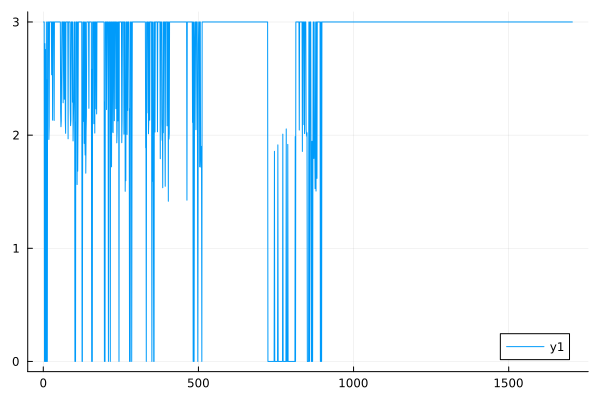

In [119]:
plot(min.(abs.(u),3))